In [1]:
# En model_perceptron2.ipynb, hemos visto que mal se desempeña el perceptron con el set de datos IRIS.
# Recordemos que el perceptron es un modelo de clasificacion binario. Mientras que el set de datos IRIS
# Posee 3 clases.

# ¿por que funciona tan mal el perceptron para un problema de clasficacion que no es binario?
# ¿alguna idea?

# Lo que vamos a hacer ahora, es modelar un perceptron para un problema de clasificacion bianrio,
# con el mismo set de datos IRIS, pero restringiendo la clasificacion a la clase 0 y a la clase 1, 
# es decir, que el perceptron sea capaz de discriminar entre setosa (0) y versicolor ( 1)

# Para esto tenemos que seleccionar las instancias correspondientes a setosa (0) y versicolor ( 1).

In [151]:
# Carga de paquetes y dependencias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np #nos permite manejar arrays

# Carga de los datos
# vamos a aprender a trabajar directamente con datos en formato csv utilizando PANDAS.
# descargamos dataset iris de https://www.kaggle.com/uciml/iris

# Id
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
# Species

import pandas as pd

# Read in the survey CSV
data_df = pd.read_csv("Iris.csv")

print(data_df)




      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [152]:
# nos quedamos con las instancias Iris-setosa  y Iris-versicolor

newdata = data_df[data_df.Species != 'Iris-virginica']

print(newdata)

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     1            5.1           3.5            1.4           0.2   
1     2            4.9           3.0            1.4           0.2   
2     3            4.7           3.2            1.3           0.2   
3     4            4.6           3.1            1.5           0.2   
4     5            5.0           3.6            1.4           0.2   
..  ...            ...           ...            ...           ...   
95   96            5.7           3.0            4.2           1.2   
96   97            5.7           2.9            4.2           1.3   
97   98            6.2           2.9            4.3           1.3   
98   99            5.1           2.5            3.0           1.1   
99  100            5.7           2.8            4.1           1.3   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
95  Iris-versicol

In [198]:
# seleccionamos los atributos de entrada X  y la clase Y

X = newdata.iloc[:, 1:5] # aqui el 5 no incluye la variable clase. Cosas de Python.

# si solo queremos utilizar SepalLengthCm y  SepalWidthCm
#X = newdata.iloc[:, 1:3] #.


print(X)
#type(X)
Y = newdata['Species']
#print(Y)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0             5.1           3.5            1.4           0.2
1             4.9           3.0            1.4           0.2
2             4.7           3.2            1.3           0.2
3             4.6           3.1            1.5           0.2
4             5.0           3.6            1.4           0.2
..            ...           ...            ...           ...
95            5.7           3.0            4.2           1.2
96            5.7           2.9            4.2           1.3
97            6.2           2.9            4.3           1.3
98            5.1           2.5            3.0           1.1
99            5.7           2.8            4.1           1.3

[100 rows x 4 columns]


In [199]:
# Pero resulta que X e Y estan en formato DataFrame. Tenemos que convertirlos a ARRAY.

X = X.to_numpy()
# X = X[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
print(X)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [156]:
type(X)


numpy.ndarray

In [200]:
# Con el array Y, estan en formato factor (tenemmos que transformar a 0 / 1)
Y = pd.factorize(Y)[0]

# y ahora a array (no es necesario porque el pd.factorize lo hace)
#Y = Y.to_numpy()

#Y = 2*Y -1
type(Y)
print(Y)



[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [201]:
# Ahora creamos el modelo y agregamos el perceptron, es cual es una Dense layer

model = Sequential()
# incializamos así:
# model.add(Dense(units = 1, activation='hard_sigmoid'))

model.add(Dense(1, input_shape=(4,), activation='hard_sigmoid', kernel_initializer='random_uniform'))
#model.add(Dense(1, input_shape=(2,), activation='hard_sigmoid', kernel_initializer='random_uniform'))


# Ahora compilamos el modelo y lo inicializamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
# hacemos fit de datos en este psudo perceptron (entrenamiento).
# Presentamos los datos a nuestro pseudo perceptron. Esto le dice a Keras que comience el proceso de 
# entrenamiento.
    
history = model.fit(X, Y, epochs=225, batch_size=25, verbose=0, validation_split=0.2)

Text(0, 0.5, 'Accuracy')

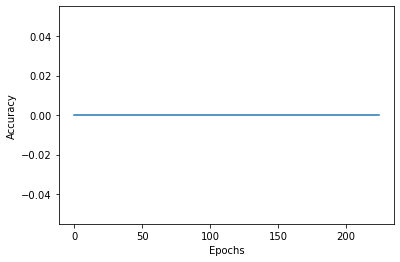

In [203]:
# Veamos cómo se desarrolla el accuracy en las iteraciones

import matplotlib.pyplot as plt #cargamos paquete para graficar

epochs = range(len(history.epoch))  #creamos un vector rango de 0 a 255

plt.figure()
plt.plot(epochs, history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

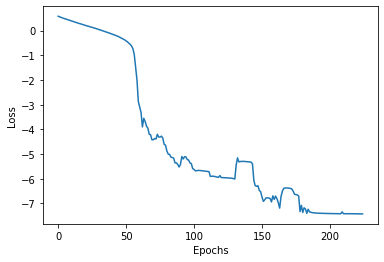

In [204]:
# Veamos un plot de la funcion de perdida a traves de las iteraciones

plt.figure()
plt.plot(epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [205]:
# recuperemos los pesos

#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

w1 = weights[0][0] #a
w2 = weights[1][0] #b
w3 = weights[2][0] #c
w4 = weights[3][0] #c
b = biases[0]      #d

In [206]:
print(weights)
print(b)

[[-0.26791894]
 [-0.35912582]
 [ 0.08256736]
 [ 0.29432705]]
-0.29932258


In [207]:
# w1*x + w2*y + b = 0  ec de la recta
# y = -(b - w1*x) / w1


x_min = X[:,0].min()
x_max = X[:,0].max()
x = np.linspace(x_min, x_max, 100)

#y_min = X[:,1].min()
#y_max = X[:,1].max()
#y = np.linspace(x_min, x_max, 100)

y = (-(w1 / w2))*x + (-b / w2) 




Text(0, 0.5, 'Sepal width')

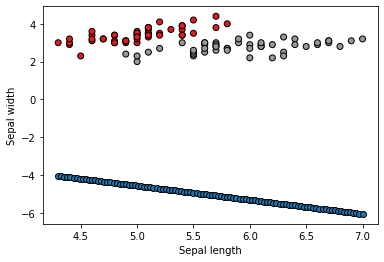

In [208]:
#Xs = np.meshgrid(x)
#Ys = ( a*x - d)/b 


plt.figure()
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.scatter(x, y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')



In [150]:
print(biases)


[-0.15435171]
